## 
Colorado 
Plots Comparisons
Tensor elevation + cell

In [98]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import scipy
import cftime
import cartopy
import cartopy.crs as ccrs
import matplotlib.colors as colors
import cmaps
from xhistogram.xarray import histogram
from statsmodels.nonparametric.smoothers_lowess import lowess as  sm_lowess
from copy import copy
import geopandas as gpd
from shapely.geometry import Point

In [99]:
state_borders =\
cartopy.feature.NaturalEarthFeature(category='cultural',\
        name='admin_1_states_provinces_lakes', scale='50m', facecolor='none')

In [100]:
import warnings
warnings.filterwarnings('ignore')

# READ EVGAM output FILES

In [101]:
yearb=1941
yeare=2025

lon_min = 250.6
lon_max = 258.5
lat_min = 36.7
lat_max = 41.3

dirin ='/Users/ghervieux/AFI'

ds0 = xr.open_dataset(f'{dirin}/Colorado_ij_glost_extremes_gev_1941_2025.nc')
rl1000 = ds0['rl100']
loc0 = ds0['location'] 
scale0 = ds0['scale'] 
shape0 = ds0['shape'] 
LocationDiff_q0 = ds0['LocationDiff_q']*np.nan
ScaleDiff_q0 = ds0['ScaleDiff_q']*np.nan
RLDiff_q0 = ds0['RLDiff_q']*np.nan
RiskRatios_q0 = ds0['RiskRatios_q']*np.nan
RLDiff_fitted0 = ds0['RLDiff_fitted']
WCRPS0 = ds0['WCRPS']
CRPS0 = ds0['CRPS']
DawSeb0 = ds0['DawSeb']
SE0 = ds0['SE']
KS_D0 = ds0['KS_D']
KS_pvalue0 = ds0['KS_pvalue']
CVM_D0 = ds0['CVM_D']
CVM_pvalue0 = ds0['CVM_pvalue']

ds1 = xr.open_dataset(f'{dirin}/Colorado_evgam_scores_1941_2025.nc')
rl1001 = ds1['rl100'] 
loc1 = ds1['location'] 
scale1 = ds1['scale'] 
shape1 = ds1['shape'] 
LocationDiff_q1 = ds1['LocationDiff_q']
ScaleDiff_q1 = ds1['ScaleDiff_q']
RLDiff_q1 = ds1['RLDiff_q']
RiskRatios_q1 = ds1['RiskRatios_q']
RLDiff_fitted1 = ds1['RLDiff_fitted']
WCRPS1 = ds1['WCRPS']
CRPS1 = ds1['CRPS']
DawSeb1 = ds1['DawSeb']
SE1 = ds1['SE']
KS_D1 = ds1['KS_D']
KS_pvalue1 = ds1['KS_pvalue']
CVM_D1 = ds1['CVM_D']
CVM_pvalue1 = ds1['CVM_pvalue']

units = 'degree-days (°C)'

Tlabels = ['extRemes (time covariate)','Evgam (space + time covariates)']

##
Evgam :    covariates: Mean Winter Temperature (DJFtas), Global Land and Ocean Average Temperature Anomalies (GLOST)

formula_gev <- list(AFI 

~ s(DJFtas,bs="cr",k=10) + s(cell,k=50, bs="mrf", xt = list(nb = nb)) + s(cell,k=12, bs="mrf", xt = list(nb = nb),by=glost) ,

~ s(DJFtas,bs="cr",k=10) + s(cell,k=50, bs="mrf", xt = list(nb = nb)) + s(cell,k=12, bs="mrf", xt = list(nb = nb),by=glost) , 

~ s(DJFtas,bs='cr',k=10) + s(cell,k=50, bs="mrf", xt = list(nb = nb)) )

In [102]:
Trl100 = [rl1000,rl1001]
Tloc = [loc0,loc1]
Tscale = [scale0,scale1]
Tshape = [shape0,shape1]
#
Tlocdiff = [LocationDiff_q0,LocationDiff_q1]
Tscalediff = [ScaleDiff_q0,ScaleDiff_q1]
TRLdiffq = [RLDiff_q0,RLDiff_q1]
TRR = [RiskRatios_q0,RiskRatios_q1]
Trldiff = [RLDiff_fitted0,RLDiff_fitted1]
#
TSE = [SE0,SE1]
TDawSeb = [DawSeb0,DawSeb1]
TCRPS = [CRPS0,CRPS1]
TWCRPS = [WCRPS0,WCRPS1]
#
TKS_D = [KS_D0,KS_D1]
TKS_pvalue = [KS_pvalue0,KS_pvalue1]
TCVM_D = [CVM_D0,CVM_D1]
TCVM_pvalue = [CVM_pvalue0,CVM_pvalue1]

# PLOT Return Level 100

Text(0.5, 0.98, 'Return Level 100year')

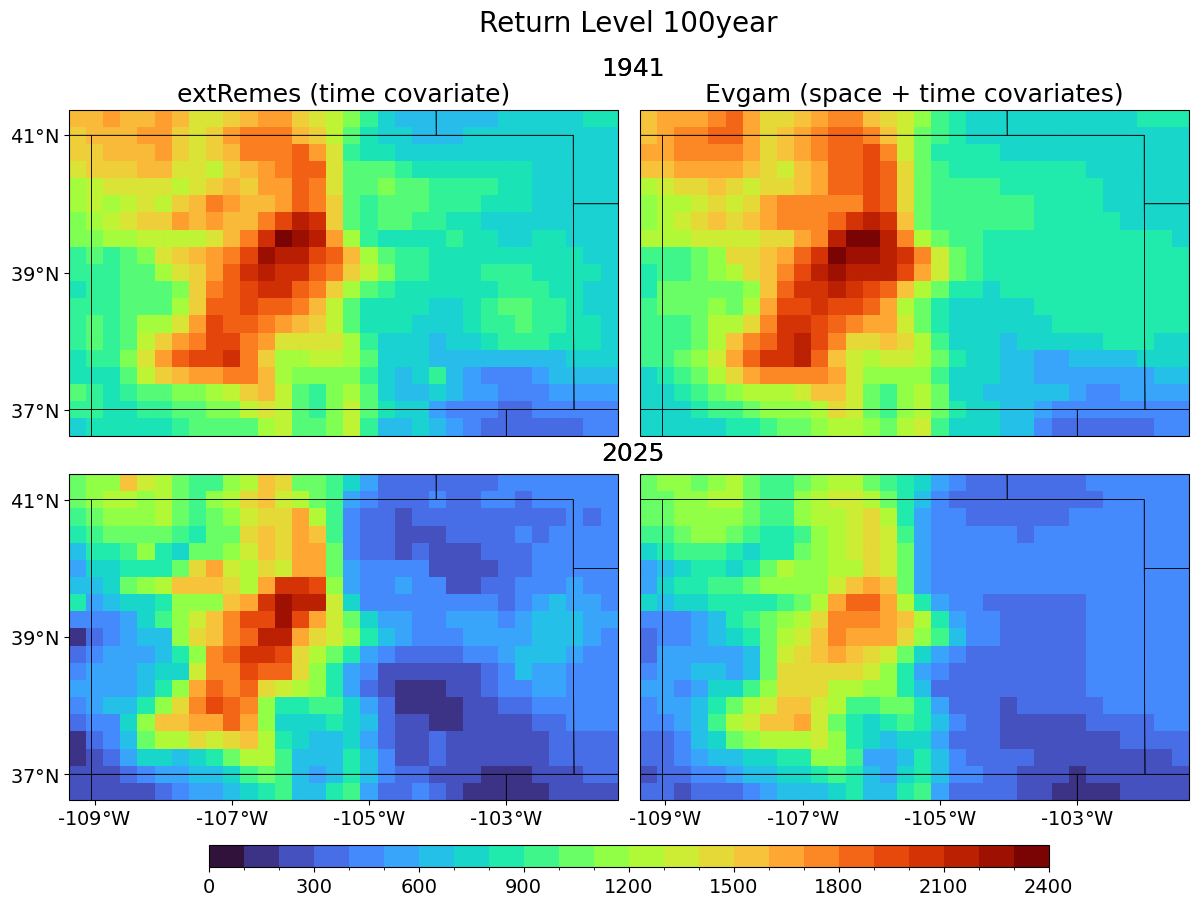

In [103]:
roj=ccrs.PlateCarree()
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(14,11),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.25,left=0.1, right=0.9,top=0.9,hspace=0.04,wspace=0.04)
ax = ax.flatten()
for ix in range(0,2):
  cc = Trl100[ix].sel(time=yearb).plot.pcolormesh(ax=ax[ix],cmap='turbo',levels=np.arange(0,2500,100),add_colorbar=False)
  cc = Trl100[ix].sel(time=yeare).plot.pcolormesh(ax=ax[ix+2],cmap='turbo',levels=np.arange(0,2500,100),add_colorbar=False)
  fig.text(0.48,0.92,yearb,fontsize=18)
  fig.text(0.48,0.57,yeare,fontsize=18)
  ####
for ix in range(0,len(ax)):  
  grd = ax[ix].gridlines(
    draw_labels=False, 
    color='gray', alpha=0.01, linestyle='--')
 
  ax[ix].set_xlabel('')
  ax[ix].set_ylabel('')
  ax[ix].add_feature(state_borders,zorder=100,linewidth=0.4,edgecolor='k')
  ax[ix].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15) 
  ax[ix].coastlines()
  if ix >=len(ax)-2:
    ax[ix].set_xticks(ax[ix].get_xticks()[1:-1:2],crs=ccrs.PlateCarree())
    ax[ix].set_xticklabels([f'{round(ixx)}$\degree$W' for ixx in ax[ix].get_xticks()],size=14)
    ax[ix].set_title('',fontsize=18)  
  elif ix <=1:
    ax[ix].set_title(f'{Tlabels[ix]}',fontsize=18)    
  else:
    ax[ix].set_title('',fontsize=18) 

for ix in range(0,3,2): 
  ax[ix].set_yticks(ax[ix].get_yticks()[1:-1:2],crs=ccrs.PlateCarree())
  ax[ix].set_yticklabels([f'{round(ixx)}$\degree$N' for ixx in ax[ix].get_yticks()],size=14)
#
ax_cbar = fig.add_axes([0.2, 0.2, 0.6, 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=f'',fontsize=16)
plt.suptitle(f'Return Level 100year',fontsize=20)  

Text(0.5, 0.98, 'Return Level 100year Difference 2025 - 1941')

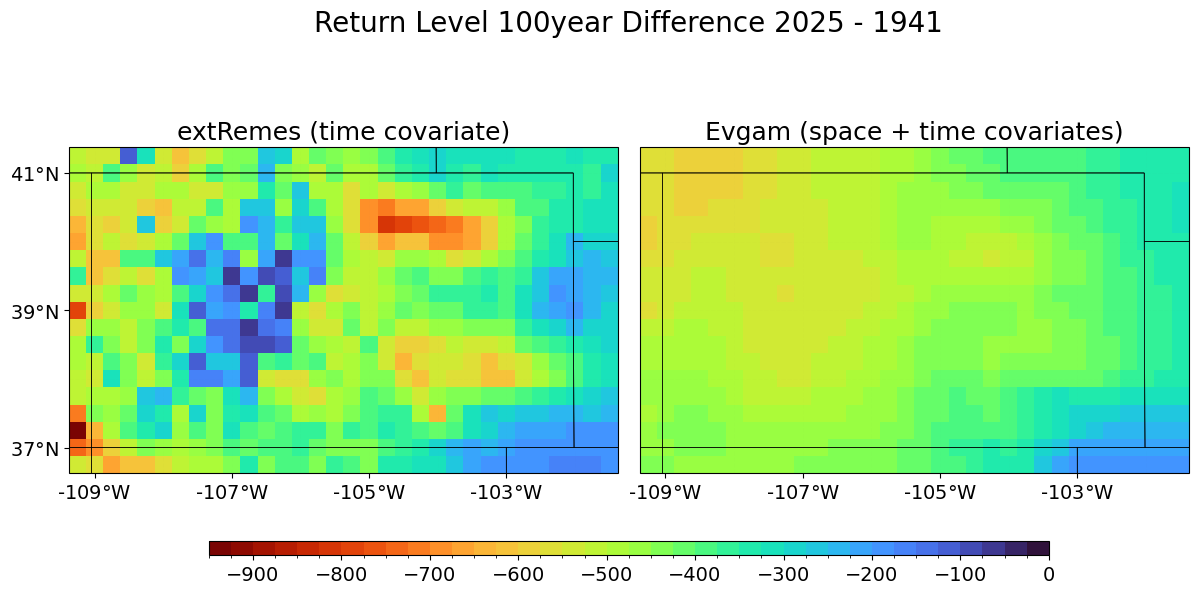

In [104]:
proj=ccrs.PlateCarree()
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,7),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.2,left=0.1, right=0.9,top=0.9,hspace=0.04,wspace=0.04)
ax = ax.flatten()
for ix in range(0,2):
  cc = Trldiff[ix].plot.pcolormesh(ax=ax[ix],cmap='turbo_r',levels=np.arange(-950,25,25),add_colorbar=False)
  ####
for ix in range(0,len(ax)):  
  grd = ax[ix].gridlines(
    draw_labels=False, 
    color='gray', alpha=0.01, linestyle='--')
 
  ax[ix].set_xlabel('')
  ax[ix].set_ylabel('')
  ax[ix].add_feature(state_borders,zorder=100,linewidth=0.4,edgecolor='k')
  ax[ix].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15) 
  ax[ix].coastlines()
  ax[ix].set_xticks(ax[ix].get_xticks()[1:-1:2],crs=ccrs.PlateCarree())
  ax[ix].set_xticklabels([f'{round(ixx)}$\degree$W' for ixx in ax[ix].get_xticks()],size=14)
  ax[ix].set_title(f'{Tlabels[ix]}',fontsize=18)    


for ix in range(0,1,2): 
  ax[ix].set_yticks(ax[ix].get_yticks()[1:-1:2],crs=ccrs.PlateCarree())
  ax[ix].set_yticklabels([f'{round(ixx)}$\degree$N' for ixx in ax[ix].get_yticks()],size=14)
#
ax_cbar = fig.add_axes([0.2, 0.2, 0.6, 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=f'',fontsize=16)
plt.suptitle(f'Return Level 100year Difference {yeare} - {yearb}',fontsize=20)  

Text(0.5, 0.98, 'Location parameter')

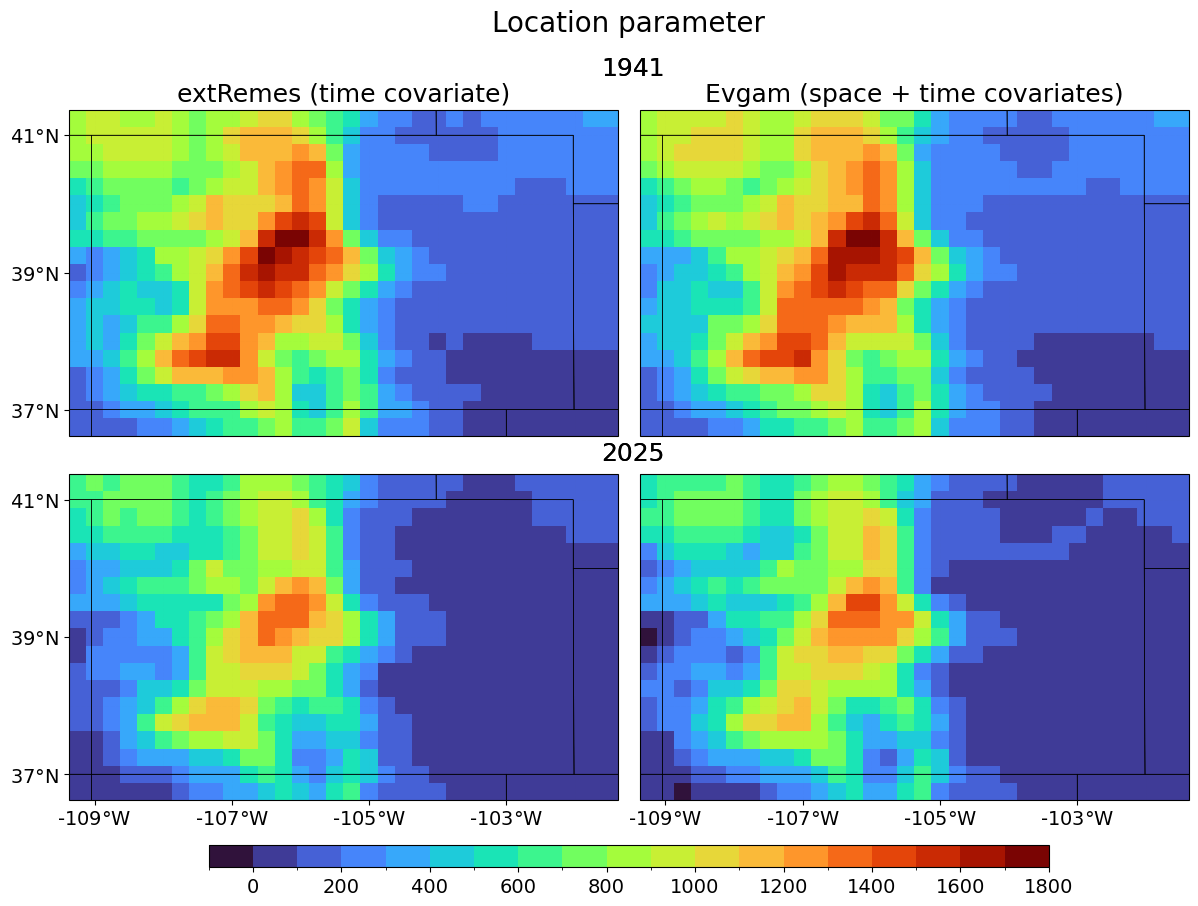

In [105]:
proj=ccrs.PlateCarree()
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(14,11),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.25,left=0.1, right=0.9,top=0.9,hspace=0.04,wspace=0.04)
ax = ax.flatten()
for ix in range(0,2):
  cc = Tloc[ix].sel(time=yearb).plot.pcolormesh(ax=ax[ix],cmap='turbo',levels=np.arange(-100,1900,100),add_colorbar=False)
  cc = Tloc[ix].sel(time=yeare).plot.pcolormesh(ax=ax[ix+2],cmap='turbo',levels=np.arange(-100,1900,100),add_colorbar=False)
  fig.text(0.48,0.92,yearb,fontsize=18)
  fig.text(0.48,0.57,yeare,fontsize=18)
  ####
for ix in range(0,len(ax)):  
  grd = ax[ix].gridlines(
    draw_labels=False, 
    color='gray', alpha=0.01, linestyle='--')
 
  ax[ix].set_xlabel('')
  ax[ix].set_ylabel('')
  ax[ix].add_feature(state_borders,zorder=100,linewidth=0.4,edgecolor='k')
  ax[ix].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15) 
  ax[ix].coastlines()
  if ix >=len(ax)-2:
    ax[ix].set_xticks(ax[ix].get_xticks()[1:-1:2],crs=ccrs.PlateCarree())
    ax[ix].set_xticklabels([f'{round(ixx)}$\degree$W' for ixx in ax[ix].get_xticks()],size=14)
    ax[ix].set_title('',fontsize=18)  
  elif ix <=1:
    ax[ix].set_title(f'{Tlabels[ix]}',fontsize=18)    
  else:
    ax[ix].set_title('',fontsize=18) 

for ix in range(0,3,2): 
  ax[ix].set_yticks(ax[ix].get_yticks()[1:-1:2],crs=ccrs.PlateCarree())
  ax[ix].set_yticklabels([f'{round(ixx)}$\degree$N' for ixx in ax[ix].get_yticks()],size=14)
#
ax_cbar = fig.add_axes([0.2, 0.2, 0.6, 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=f'',fontsize=16)
plt.suptitle(f'Location parameter',fontsize=20)  

Text(0.5, 0.98, 'Scale parameter')

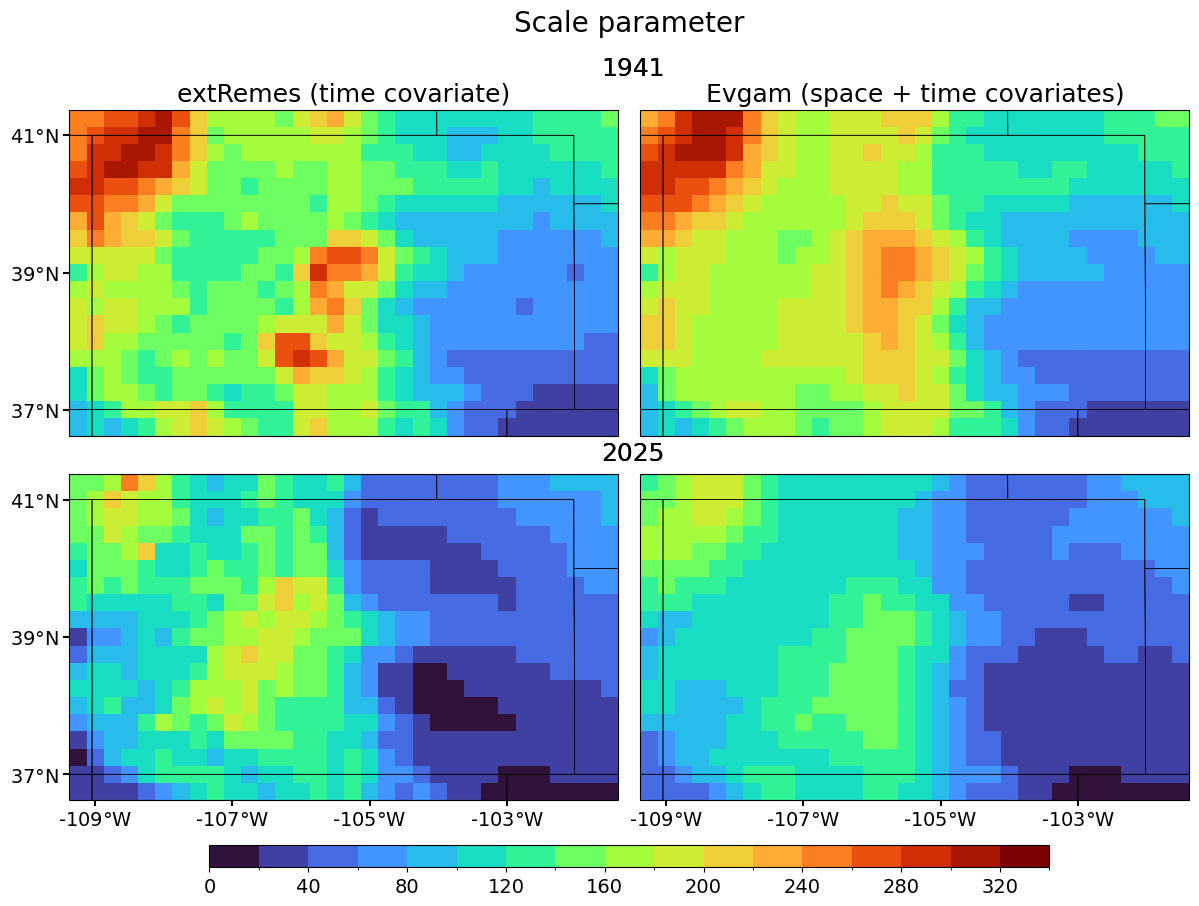

In [106]:
proj=ccrs.PlateCarree()
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(14,11),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.25,left=0.1, right=0.9,top=0.9,hspace=0.04,wspace=0.04)
ax = ax.flatten()
for ix in range(0,2):
  cc = Tscale[ix].sel(time=yearb).plot.pcolormesh(ax=ax[ix],cmap='turbo',levels=np.arange(0,360,20),add_colorbar=False)
  cc = Tscale[ix].sel(time=yeare).plot.pcolormesh(ax=ax[ix+2],cmap='turbo',levels=np.arange(0,360,20),add_colorbar=False)
  fig.text(0.48,0.92,yearb,fontsize=18)
  fig.text(0.48,0.57,yeare,fontsize=18)
  ####
for ix in range(0,len(ax)):  
  grd = ax[ix].gridlines(
    draw_labels=False, 
    color='gray', alpha=0.01, linestyle='--')
 
  ax[ix].set_xlabel('')
  ax[ix].set_ylabel('')
  ax[ix].add_feature(state_borders,zorder=100,linewidth=0.4,edgecolor='k')
  ax[ix].tick_params(axis='both',direction='out',width=1.5,length=4)
  ax[ix].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15) 
  ax[ix].coastlines()
  if ix >=len(ax)-2:
    ax[ix].set_xticks(ax[ix].get_xticks()[1:-1:2],crs=ccrs.PlateCarree())
    ax[ix].set_xticklabels([f'{round(ixx)}$\degree$W' for ixx in ax[ix].get_xticks()],size=14)
    ax[ix].set_title('',fontsize=18)  
  elif ix <=1:
    ax[ix].set_title(f'{Tlabels[ix]}',fontsize=18)    
  else:
    ax[ix].set_title('',fontsize=18) 
for ix in range(0,3,2): 
  ax[ix].set_yticks(ax[ix].get_yticks()[1:-1:2],crs=ccrs.PlateCarree())
  ax[ix].set_yticklabels([f'{round(ixx)}$\degree$N' for ixx in ax[ix].get_yticks()],size=14)
#

ax_cbar = fig.add_axes([0.2, 0.2, 0.6, 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=f'',fontsize=16)
plt.suptitle(f'Scale parameter',fontsize=20)  

Text(0.5, 0.98, 'Shape parameter, year=1941')

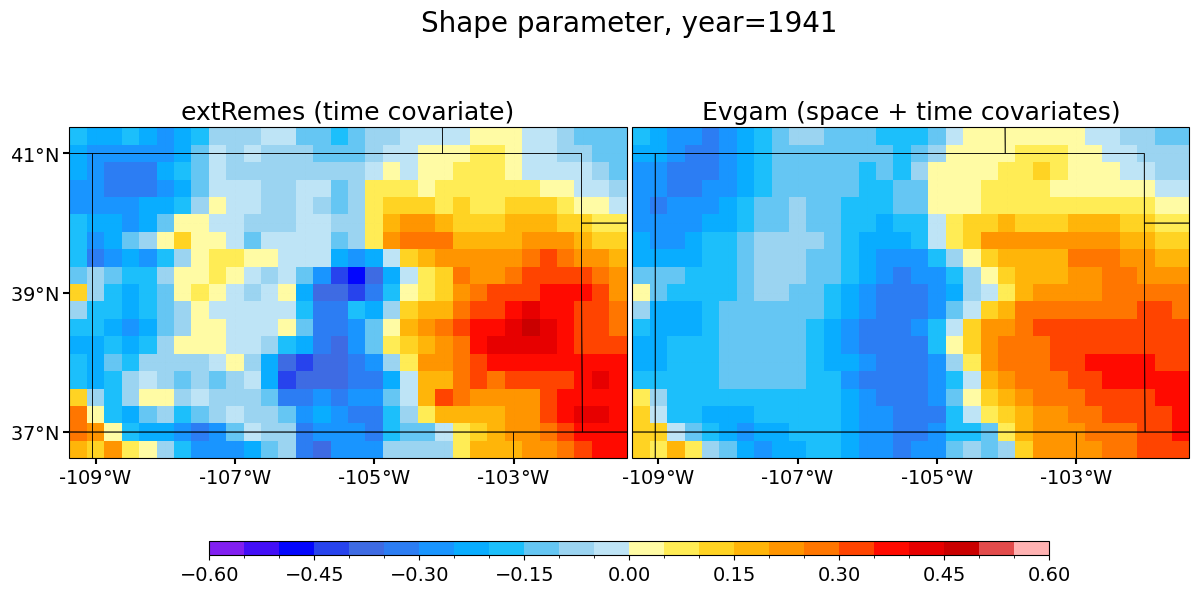

In [107]:
proj=ccrs.PlateCarree()

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,7),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.2,left=0.1, right=0.9,top=0.95,hspace=0.01,wspace=0.01)
ax = ax.flatten()
for ix in range(0,2):
  cc = Tshape[ix].sel(time=yearb).plot.pcolormesh(ax=ax[ix],cmap=cmaps.ncl_default,levels=np.arange(-0.6,0.65,0.05),add_colorbar=False)
  ####
  grd = ax[ix].gridlines(
    draw_labels=False, 
    color='gray', alpha=0.01, linestyle='--')
  ax[ix].set_title(f'{Tlabels[ix]}',fontsize=18)  
  ax[ix].set_xlabel('')
  ax[ix].set_ylabel('')
  ax[ix].add_feature(state_borders,zorder=100,linewidth=0.4,edgecolor='k')
  ax[ix].tick_params(axis='both',direction='out',width=1.5,length=4)
  ax[ix].set_xticks(ax[ix].get_xticks()[1:-1:2],crs=ccrs.PlateCarree())
  ax[ix].set_xticklabels([f'{round(ixx)}$\degree$W' for ixx in ax[ix].get_xticks()],size=14)
  ax[ix].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15) 
  ax[ix].coastlines()

for ix in range(0,1): 
  ax[ix].set_yticks(ax[ix].get_yticks()[1:-1:2],crs=ccrs.PlateCarree())
  ax[ix].set_yticklabels([f'{round(ixx)}$\degree$N' for ixx in ax[ix].get_yticks()],size=14)
#
ax_cbar = fig.add_axes([0.2, 0.2, 0.6, 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=f'',fontsize=16)
plt.suptitle(f'Shape parameter, year={yearb}',fontsize=20)  

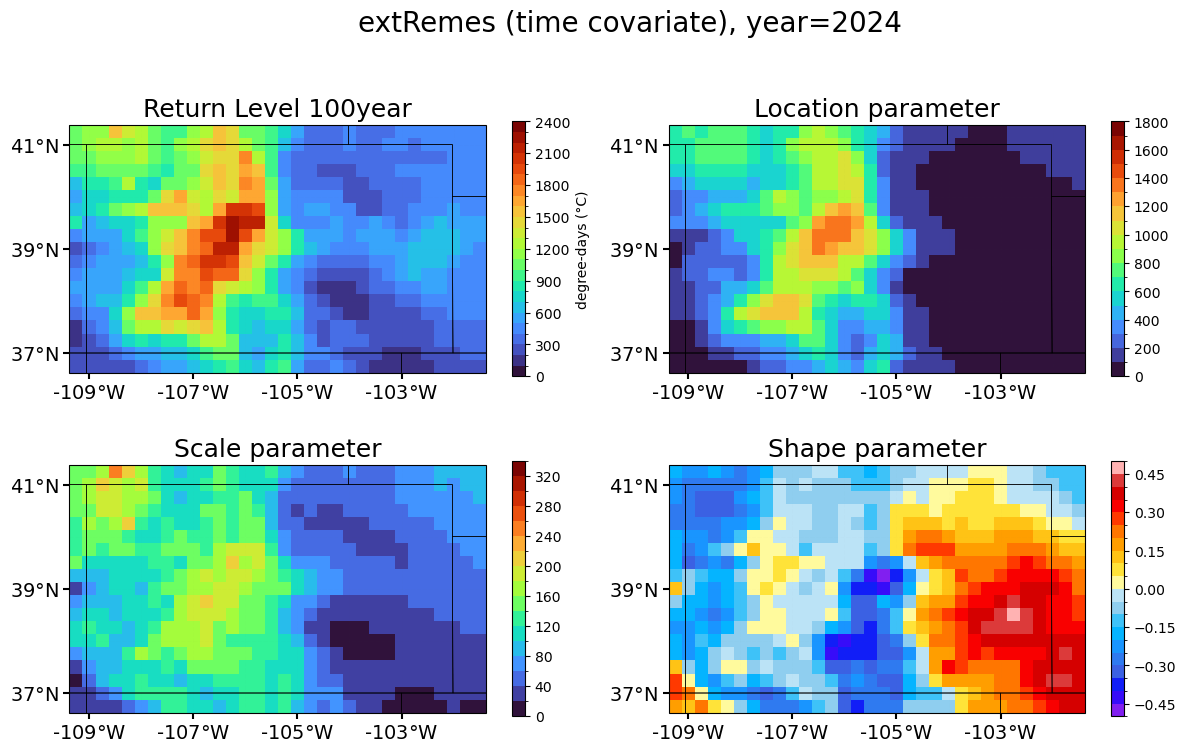

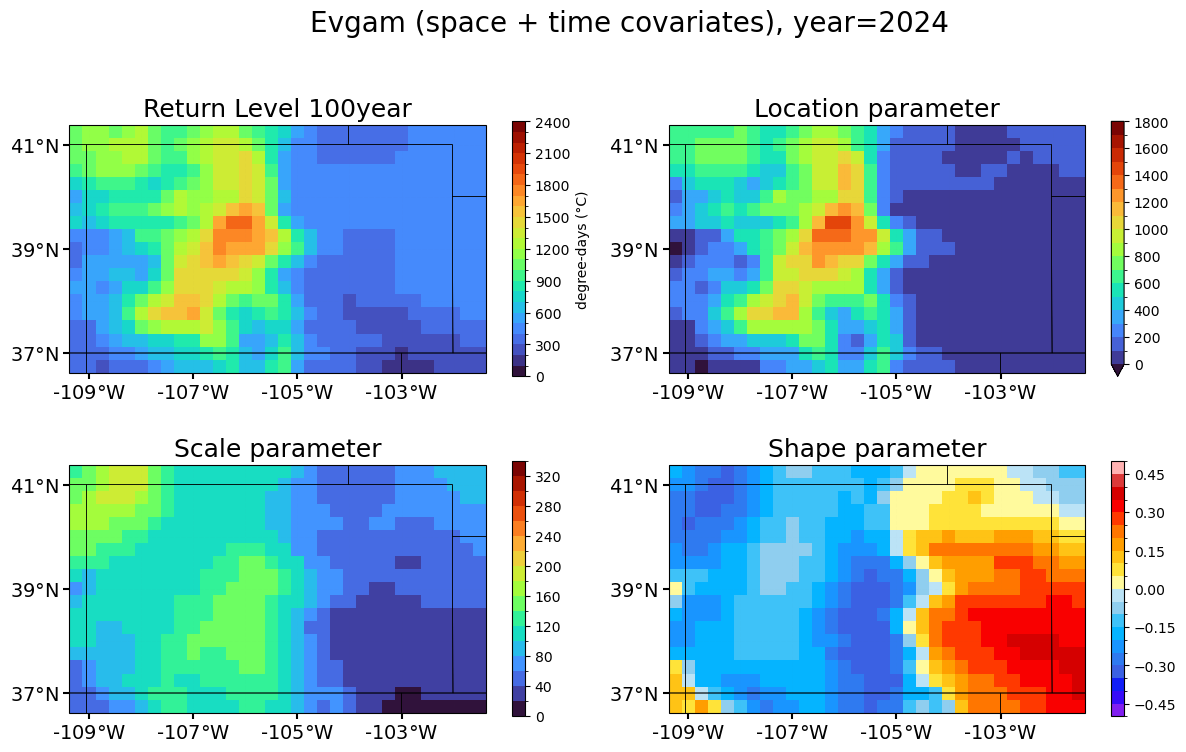

In [108]:
Tyears = [2024]
it = 1
proj=ccrs.PlateCarree()
for it in range(0,2):
 for iyear in Tyears:

  fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(14,9),subplot_kw={'projection':proj})
  plt.subplots_adjust(top=0.95,bottom=0.1,left=0.1, right=0.9,wspace=0.15,hspace=-0.2)
  ax = ax.flatten()
  Trl100[it].sel(time=iyear).plot.pcolormesh(ax=ax[0],cmap='turbo',levels=np.arange(0,2500,100),cbar_kwargs={'label':units,'shrink':0.6})
  ax[0].set_title(f'Return Level 100year',fontsize=18)  
  Tloc[it].sel(time=iyear).plot.pcolormesh(ax=ax[1],cmap='turbo',levels=np.arange(0,1900,100),cbar_kwargs={'label':'','shrink':0.6})
  ax[1].set_title(f'Location parameter',fontsize=18)  
  Tscale[it].sel(time=iyear).plot.pcolormesh(ax=ax[2],cmap='turbo',levels=np.arange(0,360,20),cbar_kwargs={'label':'','shrink':0.6})
  ax[2].set_title(f'Scale parameter',fontsize=18)  
  Tshape[it].sel(time=iyear).plot.pcolormesh(ax=ax[3],cmap=cmaps.ncl_default,levels=np.arange(-0.5,0.55,0.05),cbar_kwargs={'label':'','shrink':0.6})
  ax[3].set_title(f'Shape parameter',fontsize=18)  
  ####
  for ix in range(0,4): 
    grd = ax[ix].gridlines(
        draw_labels=False, 
        color='gray', alpha=0.01, linestyle='--')

    ax[ix].set_xlabel('')
    ax[ix].set_ylabel('')
    ax[ix].add_feature(state_borders,zorder=100,linewidth=0.4,edgecolor='k')
    ax[ix].tick_params(axis='both',direction='out',width=1.5,length=4)
    ax[ix].set_yticks(ax[ix].get_yticks()[1:-1:2],crs=ccrs.PlateCarree())
    ax[ix].set_yticklabels([f'{round(ixx)}$\degree$N' for ixx in ax[ix].get_yticks()],size=14)
    ax[ix].set_xticks(ax[ix].get_xticks()[1:-1:2],crs=ccrs.PlateCarree())
    ax[ix].set_xticklabels([f'{round(ixx)}$\degree$W' for ixx in ax[ix].get_xticks()],size=14)
    ax[ix].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15) 
    ax[ix].coastlines()
  #
  plt.suptitle(f'{Tlabels[it]}, year={iyear}',fontsize=20)  
  plt.show()

# Tests

In [109]:
from matplotlib import cm
## Build colorbar
clevsa=np.arange(0.06,1.01,0.01)
clevsb=np.arange(0,0.051,0.001)
pvalue_clevs=np.concatenate((clevsb,clevsa))
cmap = cm.get_cmap('Purples',len(clevsa)+20)
cmaplist = [cmap(i) for i in range(20,cmap.N)]
cmap2 = cm.get_cmap('YlGn_r', len(clevsb)+5)
cmaplist2 = [cmap2(i) for i in range(0,cmap2.N-5)]

pvalue_cmap = colors.LinearSegmentedColormap.from_list('Custom cmap',\
                cmaplist2+cmaplist, len(cmaplist2)+len(cmaplist))

##########
##########

Text(0.5, 0.98, 'Tests - p.value')

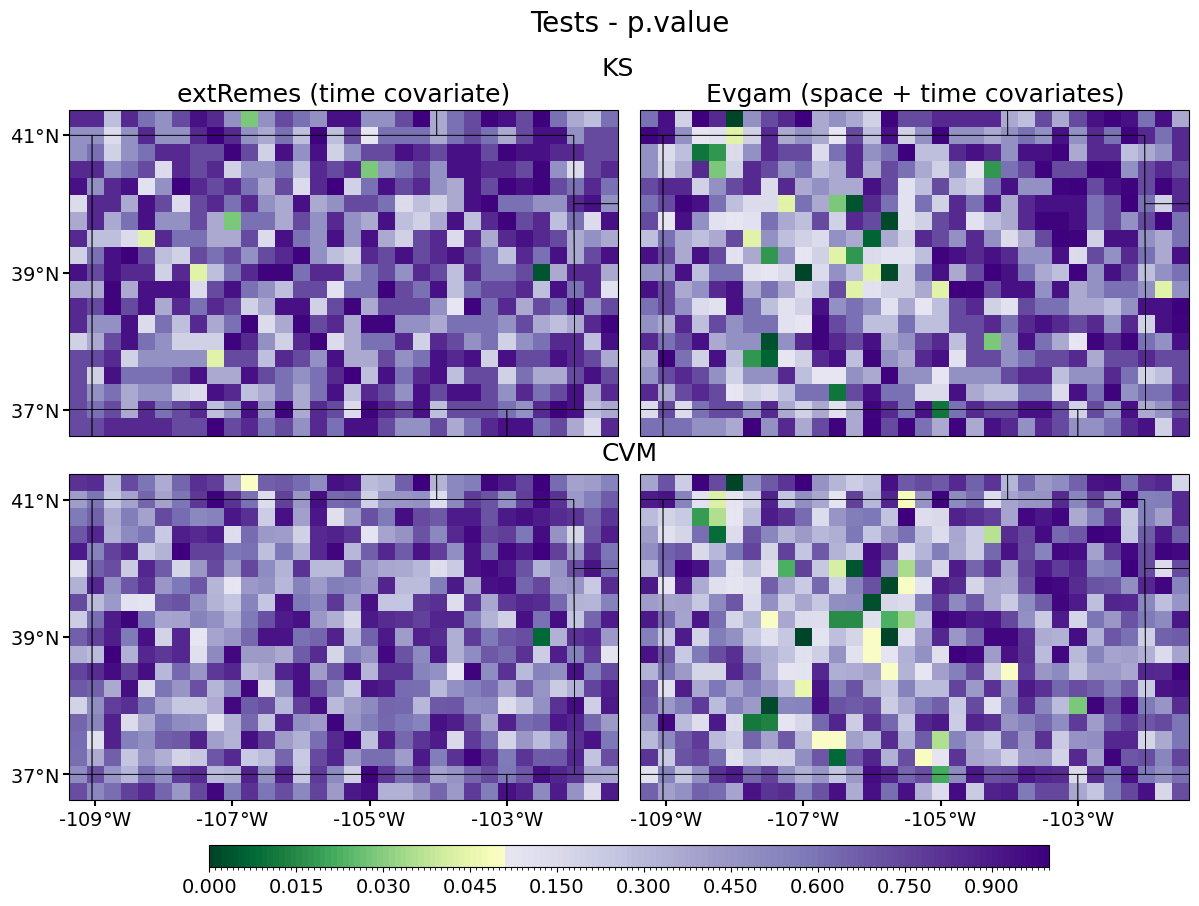

In [110]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(14,11),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.25,left=0.1, right=0.9,top=0.9,hspace=0.04,wspace=0.04)
ax = ax.flatten()
for ix in range(0,2):
  cc = TKS_pvalue[ix].plot.pcolormesh(ax=ax[ix],cmap=pvalue_cmap,levels=pvalue_clevs,add_colorbar=False)
  cc = TCVM_pvalue[ix].plot.pcolormesh(ax=ax[ix+2],cmap=pvalue_cmap,levels=pvalue_clevs,add_colorbar=False)
fig.text(0.48,0.92,'KS',fontsize=18)
fig.text(0.48,0.57,'CVM',fontsize=18)
####
for ix in range(0,len(ax)):  
  grd = ax[ix].gridlines(
    draw_labels=False, 
    color='gray', alpha=0.01, linestyle='--')
 
  ax[ix].set_xlabel('')
  ax[ix].set_ylabel('')
  ax[ix].add_feature(state_borders,zorder=100,linewidth=0.4,edgecolor='k')
  ax[ix].tick_params(axis='both',direction='out',width=1.5,length=4)
  ax[ix].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15) 
  ax[ix].coastlines()
  if ix >=len(ax)-2:
    ax[ix].set_xticks(ax[ix].get_xticks()[1:-1:2],crs=ccrs.PlateCarree())
    ax[ix].set_xticklabels([f'{round(ixx)}$\degree$W' for ixx in ax[ix].get_xticks()],size=14)
    ax[ix].set_title('',fontsize=18)  
  elif ix <=1:
    ax[ix].set_title(f'{Tlabels[ix]}',fontsize=18)    
  else:
    ax[ix].set_title('',fontsize=18) 
for ix in range(0,3,2): 
  ax[ix].set_yticks(ax[ix].get_yticks()[1:-1:2],crs=ccrs.PlateCarree())
  ax[ix].set_yticklabels([f'{round(ixx)}$\degree$N' for ixx in ax[ix].get_yticks()],size=14)
#

ax_cbar = fig.add_axes([0.2, 0.2, 0.6, 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=f'',fontsize=16)
plt.suptitle(f'Tests - p.value',fontsize=20)  

Text(0.5, 0.98, 'Tests')

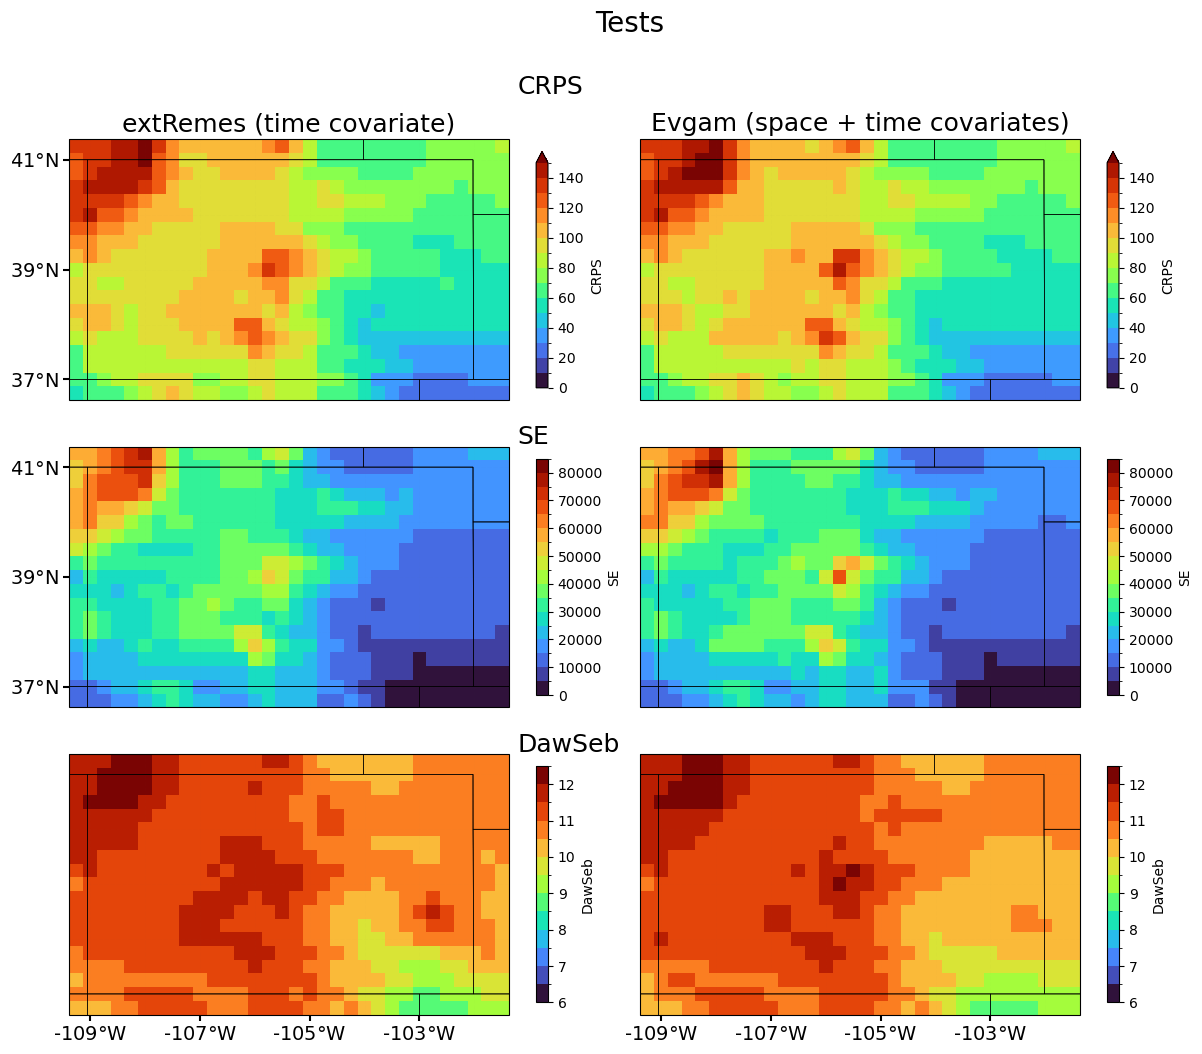

In [111]:
fig, ax = plt.subplots(nrows=3,ncols=2,figsize=(14,14),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.25,left=0.1, right=0.9,top=0.9,hspace=0.04,wspace=0.04)
ax = ax.flatten()
for ix in range(0,2):
  TCRPS[ix].mean('time').plot.pcolormesh(ax=ax[ix],cmap='turbo',levels=np.arange(0,160,10),cbar_kwargs={'shrink':0.8})
  TSE[ix].mean('time').plot.pcolormesh(ax=ax[ix+2],cmap='turbo',levels=np.arange(0,90000,5000),cbar_kwargs={'shrink':0.8})
  TDawSeb[ix].mean('time').plot.pcolormesh(ax=ax[ix+4],cmap='turbo',levels=np.arange(6,13,0.5),cbar_kwargs={'shrink':0.8})
fig.text(0.42,0.92,'CRPS',fontsize=18)
fig.text(0.42,0.67,'SE',fontsize=18)
fig.text(0.42,0.45,'DawSeb',fontsize=18)
####
for ix in range(0,len(ax)):  
  grd = ax[ix].gridlines(
    draw_labels=False, 
    color='gray', alpha=0.01, linestyle='--')
 
  ax[ix].set_xlabel('')
  ax[ix].set_ylabel('')
  ax[ix].add_feature(state_borders,zorder=100,linewidth=0.4,edgecolor='k')
  ax[ix].tick_params(axis='both',direction='out',width=1.5,length=4)
  ax[ix].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15) 
  ax[ix].coastlines()
  if ix >=len(ax)-2:
    ax[ix].set_xticks(ax[ix].get_xticks()[1:-1:2],crs=ccrs.PlateCarree())
    ax[ix].set_xticklabels([f'{round(ixx)}$\degree$W' for ixx in ax[ix].get_xticks()],size=14)
    ax[ix].set_title('',fontsize=18)  
  elif ix <=1:
    ax[ix].set_title(f'{Tlabels[ix]}',fontsize=18)    
  else:
    ax[ix].set_title('',fontsize=18) 
for ix in range(0,3,2): 
  ax[ix].set_yticks(ax[ix].get_yticks()[1:-1:2],crs=ccrs.PlateCarree())
  ax[ix].set_yticklabels([f'{round(ixx)}$\degree$N' for ixx in ax[ix].get_yticks()],size=14)
#

plt.suptitle(f'Tests',fontsize=20)  

# Changes

Text(0.5, 0.98, 'Evgam (space + time covariates): Diff Location parameter')

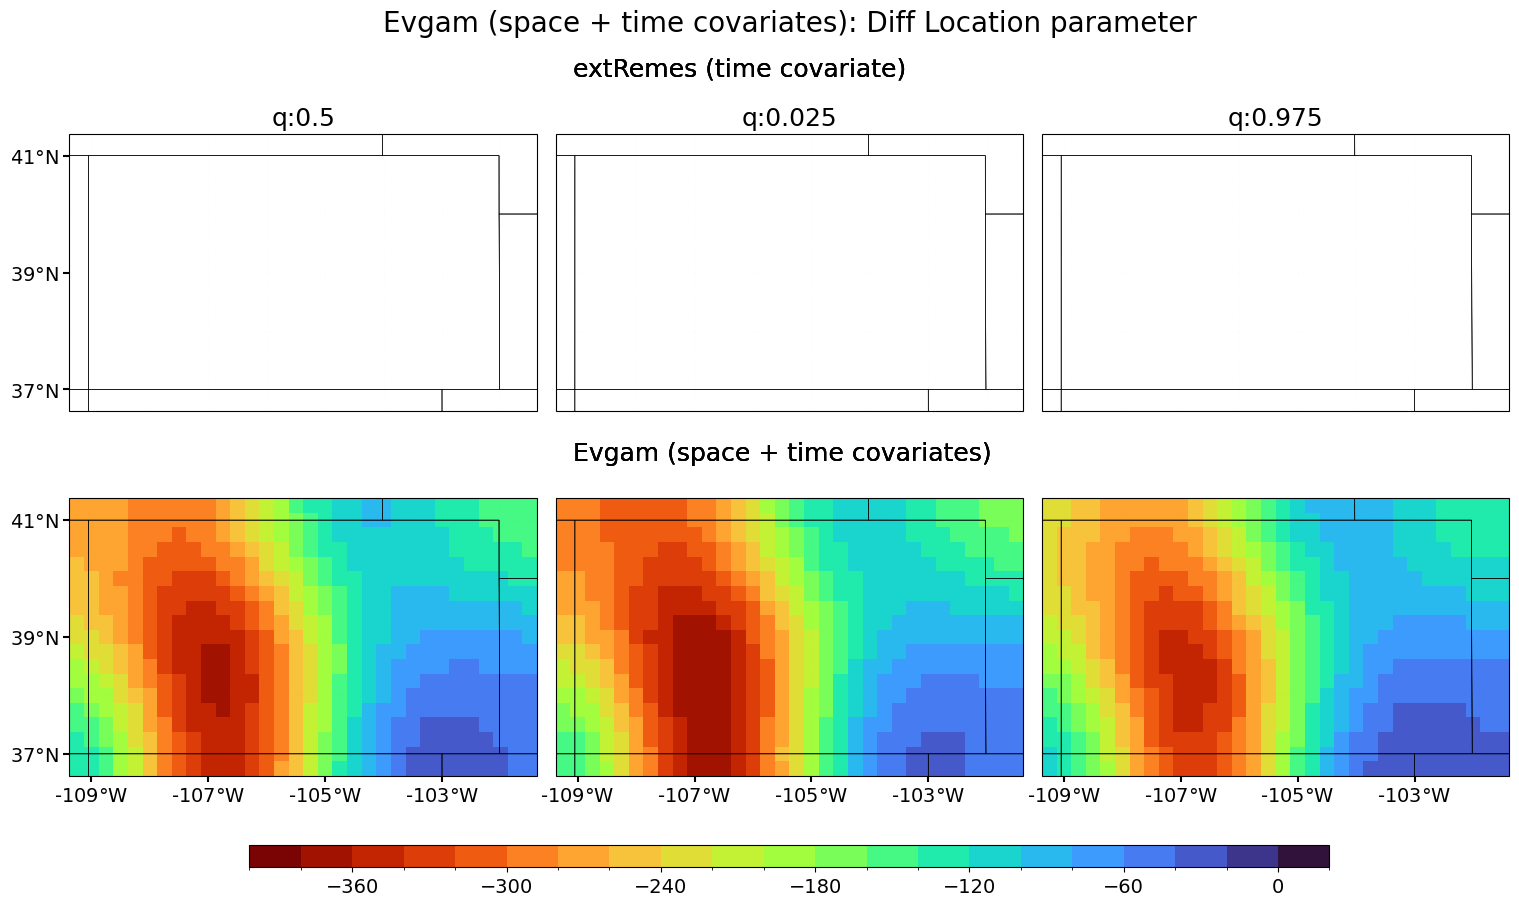

In [112]:
v=[1,2,0]

fig, ax = plt.subplots(nrows=2,ncols=len(ds1['quantile']),figsize=(18,11),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.25,left=0.1, right=0.9,top=0.9,hspace=0.04,wspace=0.04)
ax = ax.flatten()
for ix in range(0,len(ds1['quantile'])):
  iq = v[ix]
  cc = Tlocdiff[0].isel(quantile=iq).plot.pcolormesh(ax=ax[ix],levels=np.arange(-400,40,20),cmap='turbo_r',add_colorbar=False)
  cc = Tlocdiff[1].isel(quantile=iq).plot.pcolormesh(ax=ax[ix+3],levels=np.arange(-400,40,20),cmap='turbo_r',add_colorbar=False)
  fig.text(0.38,0.92,f'{Tlabels[0]}',fontsize=18)
  fig.text(0.38,0.57,f'{Tlabels[1]}',fontsize=18)
for ix in range(0,len(ax)):
    ####
  grd = ax[ix].gridlines(
    draw_labels=False, 
    color='gray', alpha=0.01, linestyle='--')
  ax[ix].set_xlabel('')
  ax[ix].set_ylabel('')
  ax[ix].add_feature(state_borders,zorder=100,linewidth=0.4,edgecolor='k')
  ax[ix].tick_params(axis='both',direction='out',width=1.5,length=4)
  ax[ix].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15) 
  ax[ix].coastlines()

  if ix >=len(ax)-3:
    ax[ix].set_xticks(ax[ix].get_xticks()[1:-1:2],crs=ccrs.PlateCarree())
    ax[ix].set_xticklabels([f'{round(ixx)}$\degree$W' for ixx in ax[ix].get_xticks()],size=14)
    ax[ix].set_title('',fontsize=18)  
  elif ix <=2:
    ax[ix].set_title(f'q:{ds1['quantile'][v[ix]].data}',fontsize=18)    
  else:
    ax[ix].set_title('',fontsize=18) 
for ix in range(0,4,3): 
  ax[ix].set_yticks(ax[ix].get_yticks()[1:-1:2],crs=ccrs.PlateCarree())
  ax[ix].set_yticklabels([f'{round(ixx)}$\degree$N' for ixx in ax[ix].get_yticks()],size=14)
#
ax_cbar = fig.add_axes([0.2, 0.2, 0.6, 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=f'',fontsize=16)
plt.suptitle(f'{Tlabels[1]}: Diff Location parameter',fontsize=20)  

Text(0.5, 0.98, 'Evgam (space + time covariates): Diff Scale parameter')

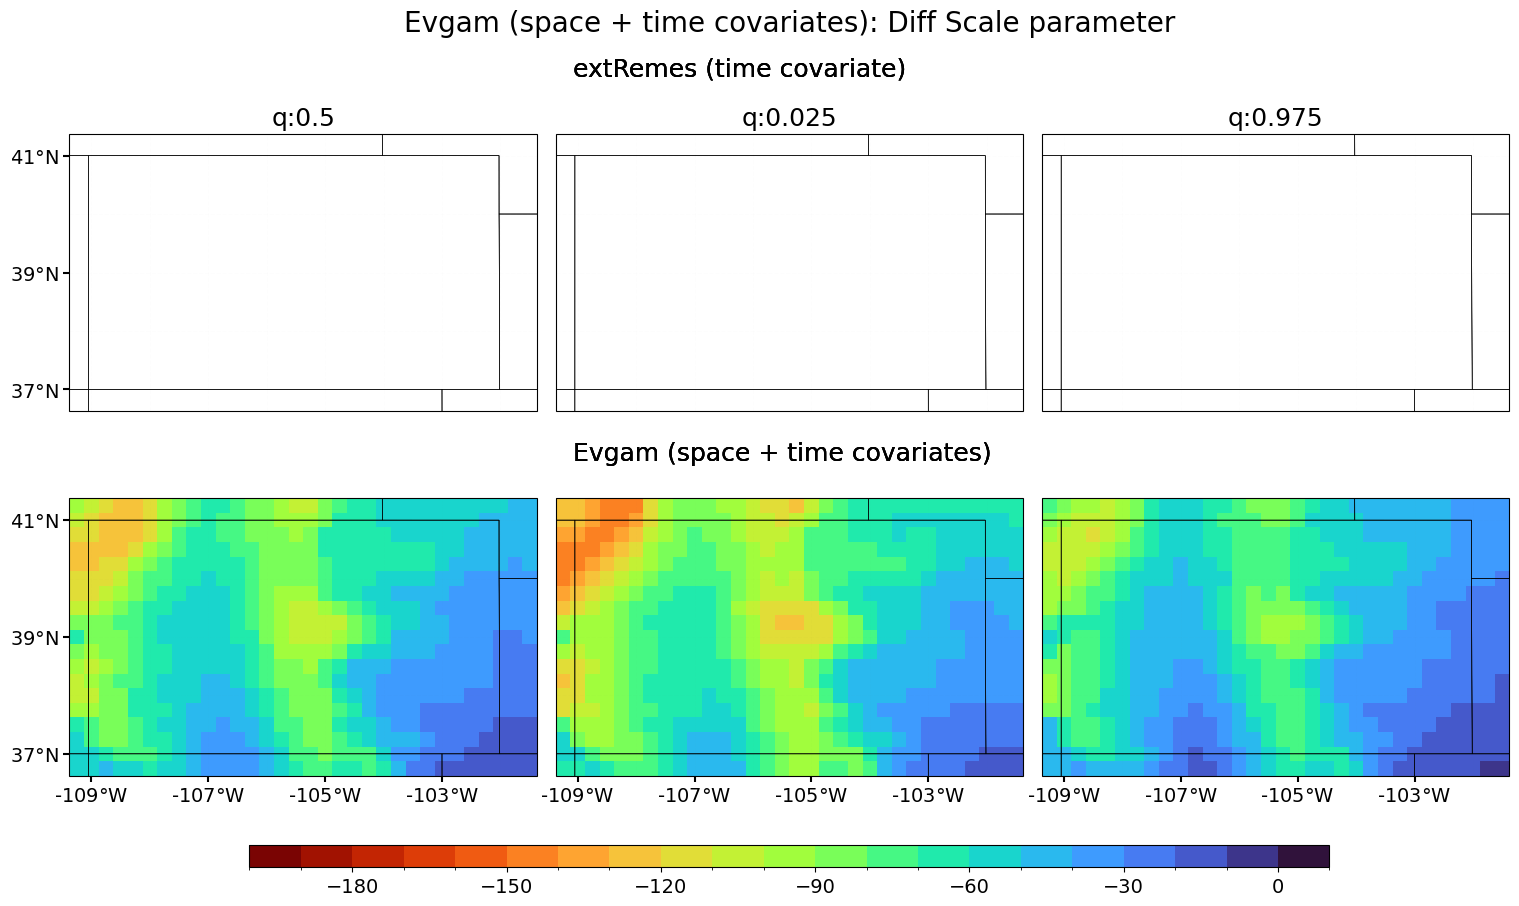

In [113]:
fig, ax = plt.subplots(nrows=2,ncols=len(ds1['quantile']),figsize=(18,11),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.25,left=0.1, right=0.9,top=0.9,hspace=0.04,wspace=0.04)
ax = ax.flatten()
for ix in range(0,len(ds1['quantile'])):
  iq = v[ix]
  cc = Tscalediff[0].isel(quantile=iq).plot.pcolormesh(ax=ax[ix],levels=np.arange(-200,20,10),cmap='turbo_r',add_colorbar=False)
  cc = Tscalediff[1].isel(quantile=iq).plot.pcolormesh(ax=ax[ix+3],levels=np.arange(-200,20,10),cmap='turbo_r',add_colorbar=False)
  fig.text(0.38,0.92,f'{Tlabels[0]}',fontsize=18)
  fig.text(0.38,0.57,f'{Tlabels[1]}',fontsize=18)
for ix in range(0,len(ax)):
    ####
  grd = ax[ix].gridlines(
    draw_labels=False, 
    color='gray', alpha=0.01, linestyle='--')
  ax[ix].set_xlabel('')
  ax[ix].set_ylabel('')
  ax[ix].add_feature(state_borders,zorder=100,linewidth=0.4,edgecolor='k')
  ax[ix].tick_params(axis='both',direction='out',width=1.5,length=4)
  ax[ix].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15) 
  ax[ix].coastlines()

  if ix >=len(ax)-3:
    ax[ix].set_xticks(ax[ix].get_xticks()[1:-1:2],crs=ccrs.PlateCarree())
    ax[ix].set_xticklabels([f'{round(ixx)}$\degree$W' for ixx in ax[ix].get_xticks()],size=14)
    ax[ix].set_title('',fontsize=18)  
  elif ix <=2:
    ax[ix].set_title(f'q:{ds1['quantile'][v[ix]].data}',fontsize=18)    
  else:
    ax[ix].set_title('',fontsize=18) 
for ix in range(0,4,3): 
  ax[ix].set_yticks(ax[ix].get_yticks()[1:-1:2],crs=ccrs.PlateCarree())
  ax[ix].set_yticklabels([f'{round(ixx)}$\degree$N' for ixx in ax[ix].get_yticks()],size=14)
#
ax_cbar = fig.add_axes([0.2, 0.2, 0.6, 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=f'',fontsize=16)
plt.suptitle(f'{Tlabels[1]}: Diff Scale parameter',fontsize=20)  

In [114]:
from matplotlib import cm
## Build colorbar
clevsa=np.arange(1.,100,1)
clevsb=np.arange(0,1.1,1)
rr_clevs=np.concatenate((clevsb,clevsa))
cmap = cm.get_cmap('afmhot_r',len(clevsa)+20)
cmaplist = [cmap(i) for i in range(20,cmap.N)]
cmap2 = cm.get_cmap('Blues_r', len(clevsb)+5)
cmaplist2 = [cmap2(i) for i in range(3,cmap2.N-2)]

rr_cmap = colors.LinearSegmentedColormap.from_list('Custom cmap',\
                cmaplist2+cmaplist, len(cmaplist2)+len(cmaplist))

##########
##########

Text(0.5, 0.98, 'Evgam (space + time covariates): Risk ratios')

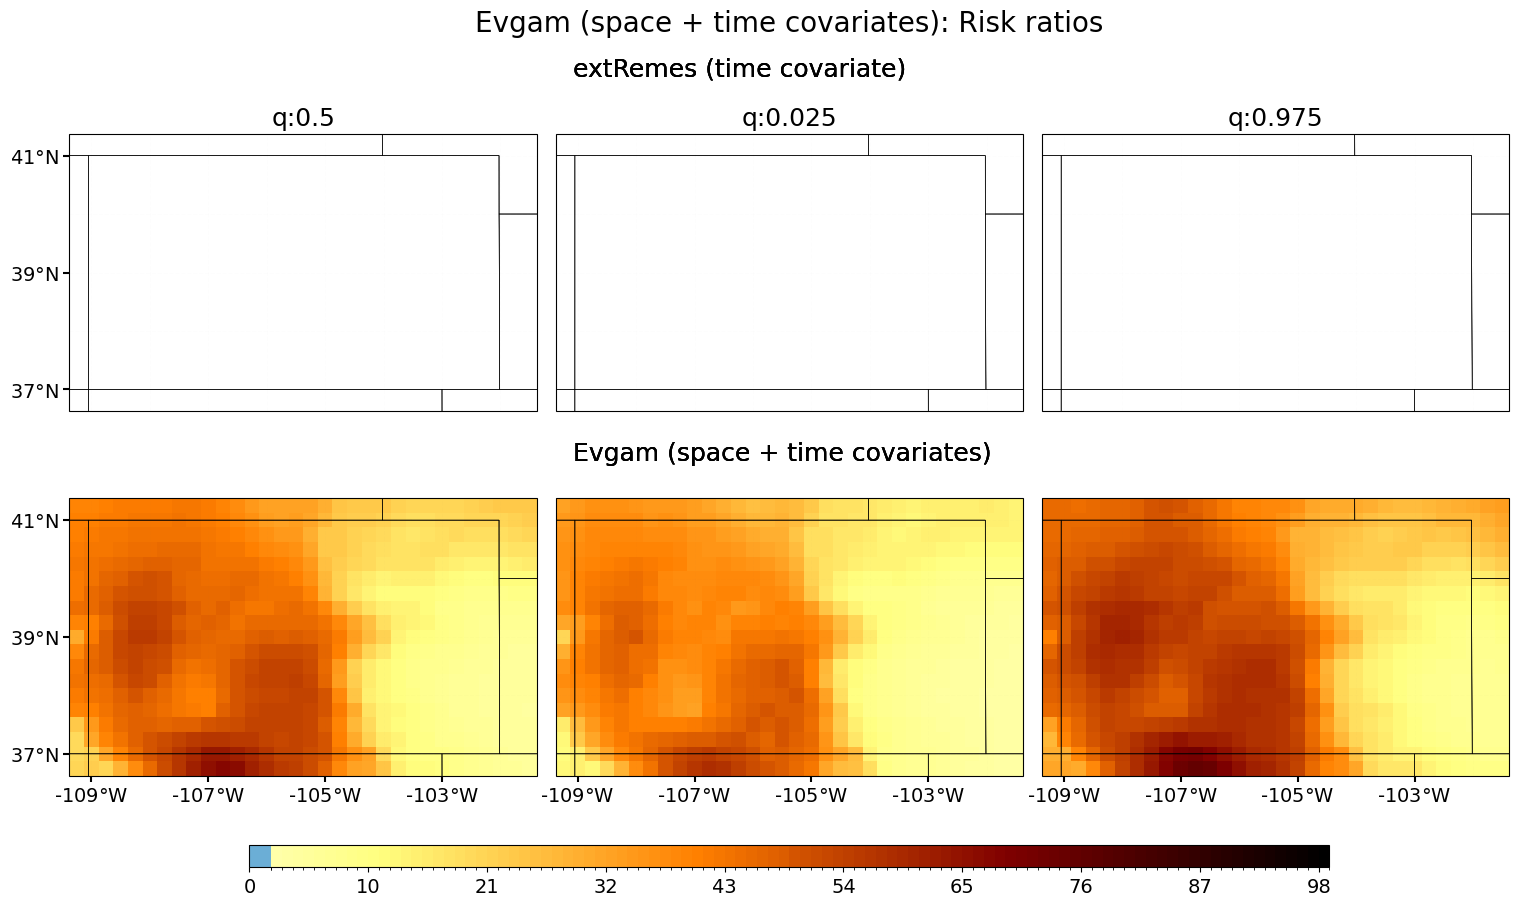

In [115]:
fig, ax = plt.subplots(nrows=2,ncols=len(ds1['quantile']),figsize=(18,11),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.25,left=0.1, right=0.9,top=0.9,hspace=0.04,wspace=0.04)
ax = ax.flatten()
for ix in range(0,len(ds1['quantile'])):
  iq = v[ix]
  cc = TRR[0].isel(quantile=iq).plot.pcolormesh(ax=ax[ix],cmap=rr_cmap,levels=rr_clevs,add_colorbar=False)
  cc = TRR[1].isel(quantile=iq).plot.pcolormesh(ax=ax[ix+3],cmap=rr_cmap,levels=rr_clevs,add_colorbar=False)
  fig.text(0.38,0.92,f'{Tlabels[0]}',fontsize=18)
  fig.text(0.38,0.57,f'{Tlabels[1]}',fontsize=18)
for ix in range(0,len(ax)):
    ####
  grd = ax[ix].gridlines(
    draw_labels=False, 
    color='gray', alpha=0.01, linestyle='--')
  ax[ix].set_xlabel('')
  ax[ix].set_ylabel('')
  ax[ix].add_feature(state_borders,zorder=100,linewidth=0.4,edgecolor='k')
  ax[ix].tick_params(axis='both',direction='out',width=1.5,length=4)
  ax[ix].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15) 
  ax[ix].coastlines()

  if ix >=len(ax)-3:
    ax[ix].set_xticks(ax[ix].get_xticks()[1:-1:2],crs=ccrs.PlateCarree())
    ax[ix].set_xticklabels([f'{round(ixx)}$\degree$W' for ixx in ax[ix].get_xticks()],size=14)
    ax[ix].set_title('',fontsize=18)  
  elif ix <=2:
    ax[ix].set_title(f'q:{ds1['quantile'][v[ix]].data}',fontsize=18)    
  else:
    ax[ix].set_title('',fontsize=18) 
for ix in range(0,4,3): 
  ax[ix].set_yticks(ax[ix].get_yticks()[1:-1:2],crs=ccrs.PlateCarree())
  ax[ix].set_yticklabels([f'{round(ixx)}$\degree$N' for ixx in ax[ix].get_yticks()],size=14)
#
ax_cbar = fig.add_axes([0.2, 0.2, 0.6, 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=f'',fontsize=16)
plt.suptitle(f'{Tlabels[1]}: Risk ratios',fontsize=20)  

Text(0.5, 0.98, 'Diff RL 100')

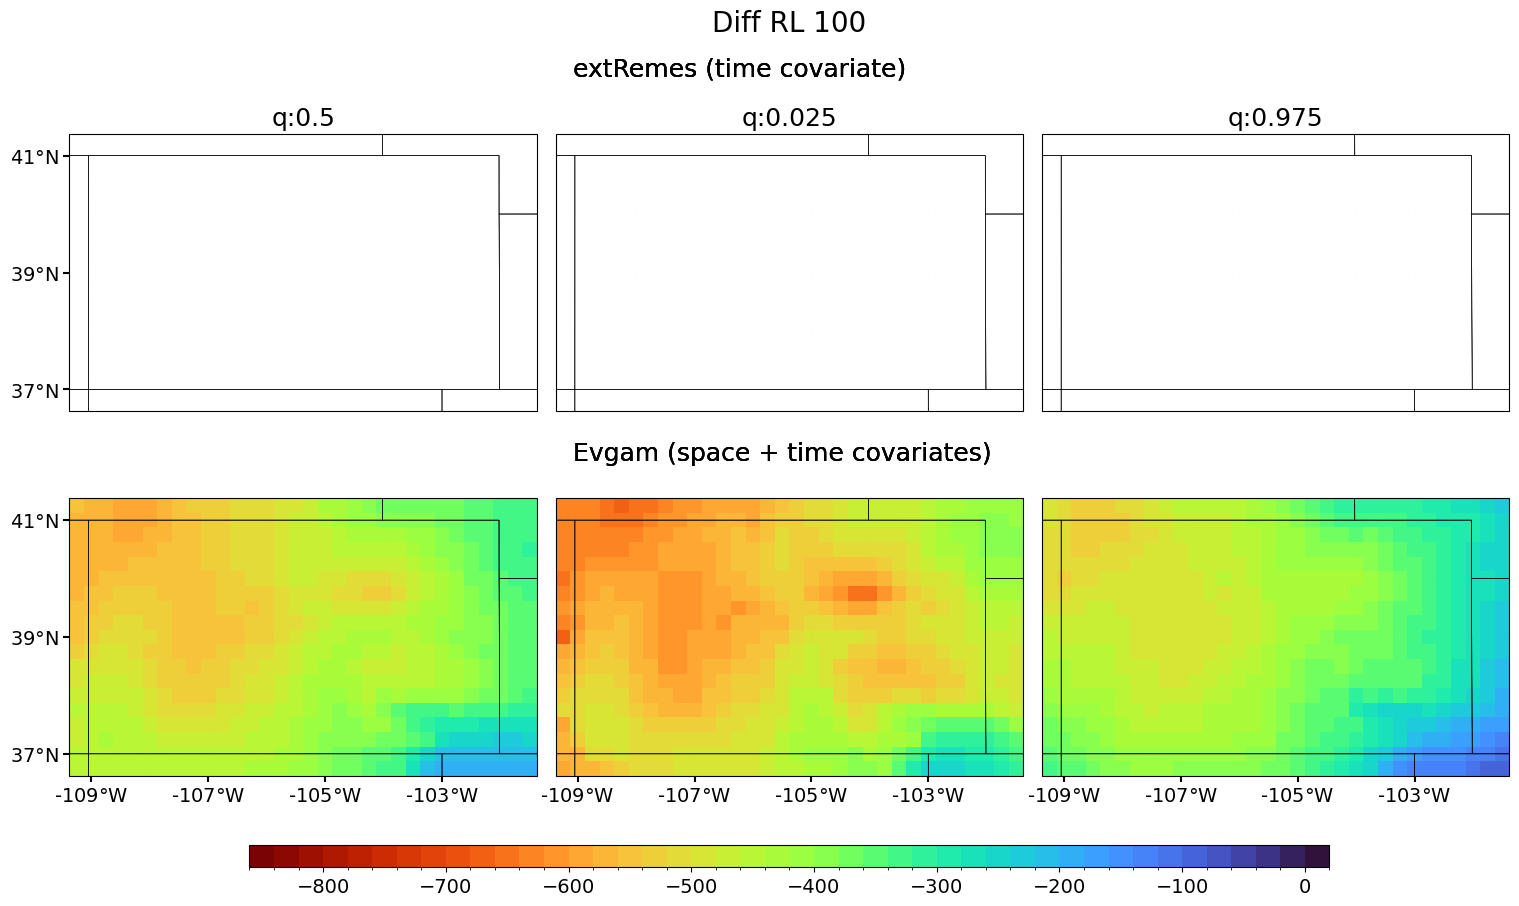

In [116]:
fig, ax = plt.subplots(nrows=2,ncols=len(ds1['quantile']),figsize=(18,11),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.25,left=0.1, right=0.9,top=0.9,hspace=0.04,wspace=0.04)
ax = ax.flatten()
for ix in range(0,len(ds1['quantile'])):
  iq = v[ix]
  cc = TRLdiffq[0].isel(quantile=iq).plot.pcolormesh(ax=ax[ix],levels=np.arange(-860,40,20),cmap='turbo_r',add_colorbar=False)
  cc = TRLdiffq[1].isel(quantile=iq).plot.pcolormesh(ax=ax[ix+3],levels=np.arange(-860,40,20),cmap='turbo_r',add_colorbar=False)
  fig.text(0.38,0.92,f'{Tlabels[0]}',fontsize=18)
  fig.text(0.38,0.57,f'{Tlabels[1]}',fontsize=18)
for ix in range(0,len(ax)):
    ####
  grd = ax[ix].gridlines(
    draw_labels=False, 
    color='gray', alpha=0.01, linestyle='--')
  ax[ix].set_xlabel('')
  ax[ix].set_ylabel('')
  ax[ix].add_feature(state_borders,zorder=100,linewidth=0.4,edgecolor='k')
  ax[ix].tick_params(axis='both',direction='out',width=1.5,length=4)
  ax[ix].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15) 
  ax[ix].coastlines()

  if ix >=len(ax)-3:
    ax[ix].set_xticks(ax[ix].get_xticks()[1:-1:2],crs=ccrs.PlateCarree())
    ax[ix].set_xticklabels([f'{round(ixx)}$\degree$W' for ixx in ax[ix].get_xticks()],size=14)
    ax[ix].set_title('',fontsize=18)  
  elif ix <=2:
    ax[ix].set_title(f'q:{ds1['quantile'][v[ix]].data}',fontsize=18)    
  else:
    ax[ix].set_title('',fontsize=18) 
for ix in range(0,4,3): 
  ax[ix].set_yticks(ax[ix].get_yticks()[1:-1:2],crs=ccrs.PlateCarree())
  ax[ix].set_yticklabels([f'{round(ixx)}$\degree$N' for ixx in ax[ix].get_yticks()],size=14)
#
ax_cbar = fig.add_axes([0.2, 0.2, 0.6, 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=f'',fontsize=16)
plt.suptitle(f'Diff RL 100',fontsize=20)  